In [ ]:
#Mei Kristina Panjaitan
#12S18006

In [ ]:
#Kode 1 

### Panduan Paling Komprehensif untuk K-Means Clustering yang Pernah Anda Butuhkan

### Gambaran
### • K-Means Clustering adalah algoritme sederhana namun kuat dalam ilmu data
### • Ada banyak sekali aplikasi K-Means Clustering di dunia nyata (beberapa di antaranya akan kami bahas di sini)
### • Panduan komprehensif ini akan memperkenalkan Anda pada dunia clustering dan K-Means Clustering bersama dengan implementasi dengan Python pada dataset dunia nyata
 
### Pengantar
### Saya suka bekerja di mesin rekomendasi. Setiap kali saya menemukan mesin rekomendasi apa pun di situs web, saya tidak sabar untuk memecahnya dan memahami cara kerjanya di bawahnya. Itu adalah salah satu dari banyak hal hebat tentang menjadi ilmuwan data!
### Yang benar-benar membuat saya terpesona tentang sistem ini adalah bagaimana kita dapat mengelompokkan item, produk, dan pengguna yang serupa. Pengelompokan ini, atau segmentasi, bekerja lintas industri. Dan itulah yang membuat konsep pengelompokan menjadi penting dalam ilmu data.
### Pengelompokan membantu kami memahami data kami dengan cara yang unik - dengan mengelompokkan berbagai hal menjadi - Anda dapat menebaknya – kelompok


### Pada artikel ini, kita akan membahas pengelompokan k-means dan komponennya secara komprehensif. Kita akan melihat pengelompokan, mengapa itu penting, aplikasinya, dan kemudian mendalami pengelompokan k-means (termasuk cara melakukannya dengan Python pada set data dunia nyata).
### Dan jika Anda ingin langsung mengerjakan kode Python, lompat langsung ke sini. Kami memiliki jendela pengodean langsung tempat Anda dapat membangun algoritme pengelompokan k-means sendiri tanpa meninggalkan artikel ini!
### Untuk mempelajari lebih lanjut tentang pengelompokan dan algoritme pembelajaran mesin lainnya (baik yang diawasi maupun tidak), lihat kursus berikut-


### • Kursus Machine Learning Terapan
### • Program Blackbelt + AI & ML Bersertifikat


### Daftar Isi
### 1. Apa itu Clustering?
### 2. Bagaimana Pengelompokan Masalah Pembelajaran Tanpa Pengawasan?
### 3. Properti Cluster
### 4. Aplikasi Clustering dalam Skenario Dunia Nyata
### 5. Memahami Metrik Evaluasi yang Berbeda untuk Clustering
### 6. Apa itu K-Means Clustering?
### 7. Menerapkan K-Means Clustering dari awal dengan Python
### 8. Tantangan dengan Algoritma K-Means
### 9. K-Means ++ untuk memilih centroid cluster awal untuk K-Means Clustering
### 10. Bagaimana cara memilih Jumlah Cluster yang Tepat di K-Means?
### 11. Menerapkan K-Means Clustering dengan Python


### Apa itu Pengelompokan?
### Mari kita mulai dengan contoh sederhana. Bank ingin memberikan penawaran kartu kredit kepada nasabahnya. Saat ini, mereka melihat detail setiap pelanggan dan berdasarkan informasi ini, memutuskan penawaran mana yang harus diberikan kepada pelanggan mana.
### Sekarang, bank berpotensi memiliki jutaan nasabah. Apakah masuk akal untuk melihat detail setiap pelanggan secara terpisah dan kemudian membuat keputusan? Tentu tidak! Ini adalah proses manual dan akan memakan banyak waktu.
### Jadi, apa yang bisa dilakukan bank? Salah satu opsinya adalah menyegmentasikan pelanggannya ke dalam kelompok yang berbeda. Misalnya, bank dapat mengelompokkan nasabah berdasarkan pendapatannya:

### Dapatkah Anda melihat ke mana saya akan pergi dengan ini? Bank sekarang dapat membuat tiga strategi atau penawaran berbeda, satu untuk setiap kelompok. Di sini, alih-alih membuat strategi berbeda untuk pelanggan individu, mereka hanya perlu membuat 3 strategi. Ini akan mengurangi tenaga serta waktu.
### Grup yang saya tunjukkan di atas dikenal sebagai cluster dan proses pembuatan grup ini dikenal sebagai clustering. Secara formal, kita dapat mengatakan bahwa:
### Clustering adalah proses membagi seluruh data menjadi beberapa kelompok (disebut juga cluster) berdasarkan pola dalam data.
### Dapatkah Anda menebak jenis pengelompokan masalah pembelajaran itu? Apakah ini masalah pembelajaran yang diawasi atau tidak diawasi?
### Pikirkan sejenak dan manfaatkan contoh yang baru saja kita lihat. Oke? Pengelompokan adalah masalah belajar tanpa pengawasan!

### Bagaimana Mengelompokkan Masalah Pembelajaran Tanpa Pengawasan?
### Misalkan Anda sedang mengerjakan sebuah proyek di mana Anda perlu memprediksi penjualan pasar besar:
 
### Atau, proyek di mana tugas Anda adalah memprediksi apakah pinjaman akan disetujui atau tidak:
 
### Kami memiliki target tetap untuk diprediksi dalam kedua situasi ini. Pada soal prediksi penjualan, kita harus memprediksi Item_Outlet_Sales berdasarkan outlet_size, outlet_location_type, dll. Dan dalam masalah loan approval, kita harus memprediksi Loan_Status berdasarkan Gender, status perkawinan, pendapatan pelanggan, dll.

### Jadi, ketika kita memiliki variabel target untuk diprediksi berdasarkan sekumpulan prediktor atau variabel independen tertentu, masalah seperti itu disebut masalah pembelajaran yang diawasi.
### Sekarang, mungkin ada situasi di mana kami tidak memiliki variabel target untuk diprediksi.
### Masalah seperti itu, tanpa variabel target tetap, dikenal sebagai masalah pembelajaran tanpa pengawasan. Dalam masalah ini, kami hanya memiliki variabel independen dan tidak ada variabel target / dependen.
### Dalam clustering, kami tidak memiliki target untuk diprediksi. Kami melihat data dan kemudian mencoba untuk mengumpulkan pengamatan serupa dan membentuk kelompok yang berbeda. Oleh karena itu, ini adalah masalah belajar yang tidak diawasi.
### Sekarang kita tahu apa itu cluster dan konsep clustering. Selanjutnya, mari kita lihat properti dari cluster ini yang harus kita pertimbangkan saat membentuk cluster.
 
### Properti Cluster
### Bagaimana dengan contoh lainnya? Kami akan mengambil bank yang sama seperti sebelumnya yang ingin menyegmentasikan pelanggannya. Untuk kesederhanaan, katakanlah bank hanya ingin menggunakan pendapatan dan hutang untuk membuat segmentasi. Mereka mengumpulkan data pelanggan dan menggunakan plot pencar untuk memvisualisasikannya:

### Pada sumbu X, kami memiliki pendapatan pelanggan dan sumbu y mewakili jumlah hutang. Di sini, kami dapat dengan jelas memvisualisasikan bahwa pelanggan ini dapat dibagi menjadi 4 cluster yang berbeda seperti yang ditunjukkan di bawah ini:

### Beginilah cara pengelompokan membantu membuat segmen (cluster) dari data. Bank selanjutnya dapat menggunakan cluster ini untuk membuat strategi dan menawarkan diskon kepada nasabahnya. Jadi mari kita lihat properti dari cluster ini.
 
### Properti 1
### Semua titik data dalam sebuah cluster harus serupa satu sama lain. Izinkan saya mengilustrasikannya menggunakan contoh di atas:

### Jika pelanggan di cluster tertentu tidak mirip satu sama lain, maka persyaratan mereka mungkin berbeda, bukan? Jika bank memberi mereka penawaran yang sama, mereka mungkin tidak menyukainya dan minat mereka pada bank mungkin berkurang. Tidak ideal.
### Memiliki titik data serupa dalam cluster yang sama membantu bank untuk menggunakan pemasaran yang ditargetkan. Anda dapat memikirkan contoh serupa dari kehidupan sehari-hari Anda dan memikirkan tentang bagaimana pengelompokan akan (atau sudah) memengaruhi strategi bisnis.

### Properti 2
### Titik data dari cluster yang berbeda harus dibuat berbeda sebisa mungkin. Ini secara intuitif akan masuk akal jika Anda memahami properti di atas. Mari kita ambil lagi contoh yang sama untuk memahami properti ini:
### Manakah dari kasus berikut yang menurut Anda akan memberi kami cluster yang lebih baik? Jika Anda melihat kasus I

### Pelanggan dalam kelompok merah dan biru sangat mirip satu sama lain. Empat poin teratas di cluster merah memiliki properti yang serupa dengan dua pelanggan teratas di cluster biru. Mereka memiliki pendapatan tinggi dan nilai hutang yang tinggi. Di sini, kami mengelompokkan mereka secara berbeda. Sedangkan jika melihat kasus II:

### Poin di cluster merah sama sekali berbeda dari pelanggan di cluster biru. Semua pelanggan di cluster merah memiliki pendapatan tinggi dan hutang tinggi dan pelanggan di cluster biru memiliki pendapatan tinggi dan nilai hutang rendah. Jelas kami memiliki pengelompokan pelanggan yang lebih baik dalam kasus ini.
### Oleh karena itu, poin data dari cluster yang berbeda harus sama berbeda satu sama lain mungkin untuk memiliki cluster yang lebih bermakna.
### Sejauh ini, kami telah memahami apa itu clustering dan berbagai properti cluster. Tetapi mengapa kita bahkan membutuhkan pengelompokan? Mari kita perjelas keraguan ini di bagian selanjutnya dan lihat beberapa aplikasi pengelompokan.

### Aplikasi Clustering dalam Skenario Dunia Nyata
### Pengelompokan adalah teknik yang banyak digunakan di industri. Ini sebenarnya digunakan di hampir setiap domain, mulai dari perbankan hingga mesin rekomendasi, pengelompokan dokumen hingga segmentasi gambar.
 
### Segmentasi pelanggan
### Kami membahas ini sebelumnya - salah satu aplikasi pengelompokan yang paling umum adalah segmentasi pelanggan. Dan itu tidak hanya terbatas pada perbankan. Strategi ini lintas fungsi, termasuk telekomunikasi, e-commerce, olahraga, periklanan, penjualan, dll.

### Pengelompokan Dokumen
### Ini adalah aplikasi umum pengelompokan lainnya. Katakanlah Anda memiliki banyak dokumen dan Anda perlu mengelompokkan dokumen serupa. Clustering membantu kami mengelompokkan dokumen-dokumen ini sedemikian rupa sehingga dokumen serupa berada dalam cluster yang sama.

### Segmentasi Gambar
### Kita juga bisa menggunakan clustering untuk melakukan segmentasi gambar. Di sini, kami mencoba menggabungkan piksel serupa pada gambar menjadi satu. Kita dapat menerapkan clustering untuk membuat cluster yang memiliki piksel serupa di grup yang sama.
### Anda dapat merujuk ke artikel ini untuk melihat bagaimana kita dapat menggunakan pengelompokan untuk tugas segmentasi gambar.

### Mesin Rekomendasi
### Clustering juga dapat digunakan di mesin rekomendasi. Misalnya Anda ingin merekomendasikan lagu ke teman Anda. Anda dapat melihat lagu-lagu yang disukai oleh orang itu dan kemudian menggunakan pengelompokan untuk menemukan lagu yang serupa dan akhirnya merekomendasikan lagu yang paling mirip.

### Masih banyak lagi aplikasi yang saya yakin sudah Anda pikirkan. Anda dapat membagikan aplikasi ini di bagian komentar di bawah. Selanjutnya, mari kita lihat bagaimana kita dapat mengevaluasi cluster kita.
 
### Memahami Berbagai Metrik Evaluasi untuk Pengelompokan
### Tujuan utama clustering tidak hanya untuk membuat cluster, tetapi untuk membuat cluster yang baik dan bermakna. Kami melihat ini pada contoh di bawah ini:
### Di sini, kami hanya menggunakan dua fitur dan karenanya mudah bagi kami untuk memvisualisasikan dan memutuskan cluster mana yang lebih baik.
### Sayangnya, skenario dunia nyata tidak bekerja seperti itu. Kami akan memiliki banyak fitur untuk dikerjakan. Mari kita ambil contoh segmentasi pelanggan lagi - kita akan memiliki fitur seperti pendapatan pelanggan, pekerjaan, jenis kelamin, usia, dan banyak lagi. Memvisualisasikan semua fitur ini bersama-sama dan memutuskan cluster yang lebih baik dan bermakna tidak akan mungkin bagi kami.
### Di sinilah kita dapat menggunakan metrik evaluasi. Mari kita bahas beberapa di antaranya dan pahami bagaimana kita dapat menggunakannya untuk mengevaluasi kualitas cluster kita.
 
### Kelembaman
#### Ingat kembali properti pertama dari cluster yang kita bahas di atas. Inilah yang mengevaluasi inersia. Ini memberi tahu kita seberapa jauh titik dalam sebuah cluster. Jadi, inersia sebenarnya menghitung jumlah jarak semua titik dalam sebuah cluster dari pusat cluster tersebut.
### Kami menghitung ini untuk semua cluster dan nilai inersia akhir adalah jumlah dari semua jarak ini. Jarak dalam cluster ini dikenal sebagai jarak intracluster. Jadi, inersia memberi kita jumlah jarak intracluster:

### Sekarang, menurut Anda apa yang seharusnya menjadi nilai inersia untuk cluster yang baik? Apakah nilai inersia kecil baik atau kita membutuhkan nilai yang lebih besar? Kami ingin poin dalam cluster yang sama serupa satu sama lain, bukan? Oleh karena itu, jarak di antara mereka harus serendah mungkin.
### Dengan mengingat hal ini, kita dapat mengatakan bahwa semakin rendah nilai inersia, semakin baik cluster kita.
 
### Indeks Dunn
### Kita sekarang tahu bahwa inersia mencoba meminimalkan jarak intracluster. Itu mencoba membuat cluster lebih kompak.
### Biar saya begini - jika jarak antara sentroid sebuah cluster dan titik-titik di cluster itu kecil, itu berarti titik-titiknya lebih dekat satu sama lain. Jadi, inersia memastikan bahwa properti pertama cluster terpenuhi. Tapi itu tidak peduli dengan properti kedua - bahwa cluster yang berbeda harus berbeda satu sama lain sebisa mungkin.
### Di sinilah indeks Dunn dapat beraksi.
### Seiring dengan jarak antara centroid dan titik, indeks Dunn juga memperhitungkan jarak antara dua cluster. Jarak antara sentroid dari dua cluster yang berbeda ini dikenal sebagai jarak antar cluster. Mari kita lihat rumus indeks Dunn:
 
### Indeks Dunn adalah rasio jarak antar cluster minimum dan jarak intracluster maksimum.
### Kami ingin memaksimalkan indeks Dunn. Semakin tinggi nilai indeks Dunn, semakin baik klasternya. Mari kita pahami intuisi di balik indeks Dunn:
 
### Untuk memaksimalkan nilai indeks Dunn, pembilangnya harus maksimal. Di sini, kami mengambil jarak antar cluster minimum. Jadi, jarak antara cluster bahkan yang terdekat harus lebih jauh yang pada akhirnya akan memastikan bahwa cluster tersebut jauh satu sama lain.
 
### Selain itu, penyebut harus minimum untuk memaksimalkan indeks Dunn. Di sini, kami mengambil jarak intracluster maksimum. Sekali lagi, intuisinya sama di sini. Jarak maksimum antara sentroid cluster dan titik-titik harus minimum yang pada akhirnya akan memastikan bahwa cluster kompak.

### Ingat properti pertama dari cluster - ini menyatakan bahwa titik-titik dalam cluster harus serupa satu sama lain. Jadi, tujuan kami di sini adalah meminimalkan jarak antara titik-titik dalam sebuah cluster.

### Ada algoritma yang mencoba meminimalkan jarak titik-titik dalam sebuah cluster dengan centroidnya - teknik clustering k-means.

### K-means adalah algoritme berbasis sentroid, atau algoritme berbasis jarak, tempat kami menghitung jarak untuk menetapkan titik ke sebuah cluster. Di K-Means, setiap cluster dikaitkan dengan sentroid.

 
### Kami memiliki 8 poin ini dan kami ingin menerapkan k-means untuk membuat cluster untuk poin-poin ini. Inilah cara kami melakukannya.
### Langkah 1: Pilih jumlah cluster k
### Langkah pertama dalam k-means adalah memilih jumlah cluster, k.
 
### Langkah 2: Pilih k titik acak dari data sebagai sentroid
### Selanjutnya, kami secara acak memilih sentroid untuk setiap cluster. Misalkan kita ingin memiliki 2 cluster, jadi k sama dengan 2 di sini. Kami kemudian secara acak memilih sentroid:
 
### Di sini, lingkaran merah dan hijau mewakili pusat massa untuk kelompok ini.
### Langkah 3: Tetapkan semua poin ke pusat cluster terdekat
### Setelah kami menginisialisasi sentroid, kami menetapkan setiap titik ke sentroid cluster terdekat:
 
### Di sini Anda dapat melihat bahwa titik-titik yang lebih dekat ke titik merah ditetapkan ke kelompok merah sedangkan titik-titik yang lebih dekat ke titik hijau ditetapkan ke kelompok hijau.
 
### Langkah 4: Hitung ulang centroid dari cluster yang baru terbentuk
### Sekarang, setelah kita menetapkan semua titik ke salah satu cluster, langkah selanjutnya adalah menghitung centroid dari cluster yang baru terbentuk:
 
### Di sini, persilangan merah dan hijau adalah sentroid baru.
 
### Langkah 5: Ulangi langkah 3 dan 4
### Kami kemudian mengulangi langkah 3 dan 4:
 
### Langkah menghitung sentroid dan menetapkan semua titik ke kluster berdasarkan jaraknya dari sentroid adalah satu iterasi. Tapi tunggu - kapan kita harus menghentikan proses ini? Itu tidak bisa berjalan sampai keabadian, bukan?

### Stopping Criteria for K-Means Clustering
### Pada dasarnya ada tiga kriteria penghentian yang dapat diadopsi untuk menghentikan algoritma K-means:
### 1. Sentroid dari cluster yang baru terbentuk tidak berubah
### 2. Poin tetap berada di cluster yang sama
### 3. Jumlah iterasi maksimum tercapai
### Kami dapat menghentikan algoritme jika sentroid dari cluster yang baru terbentuk tidak berubah. Bahkan setelah beberapa iterasi, jika kita mendapatkan centroid yang sama untuk semua cluster, kita dapat mengatakan bahwa algoritme tersebut tidak mempelajari pola baru apa pun dan itu adalah tanda untuk menghentikan pelatihan.
### Tanda jelas lainnya bahwa kita harus menghentikan proses pelatihan jika poin tetap berada dalam cluster yang sama bahkan setelah melatih algoritme untuk beberapa iterasi.
### Akhirnya, kita bisa menghentikan pelatihan jika jumlah iterasi maksimum tercapai. Misalkan kita telah menyetel jumlah iterasi sebagai 100. Proses akan berulang sebanyak 100 iterasi sebelum berhenti.

### Implementing K-Means Clustering in Python from Scratch
### Saatnya untuk menjalankan notebook Jupyter kami (atau IDE mana pun yang Anda gunakan) dan mengotori tangan kami dengan Python!
### Kami akan mengerjakan kumpulan data prediksi pinjaman yang dapat Anda unduh di sini. Saya mendorong Anda untuk membaca lebih lanjut tentang dataset dan pernyataan masalahnya di sini. Ini akan membantu Anda memvisualisasikan apa yang sedang kami kerjakan (dan mengapa kami melakukan ini). Dua pertanyaan yang cukup penting dalam proyek sains data.


### Langkah 1 dan 2 dari K-Means adalah tentang memilih jumlah cluster (k) dan memilih sentroid acak untuk setiap cluster. Kami akan memilih 3 cluster dan kemudian memilih pengamatan acak dari data sebagai sentroid:

### Nilai-nilai ini mungkin berbeda setiap kali kami menjalankan ini. Di sini, kami menghentikan pelatihan ketika sentroid tidak berubah setelah dua iterasi. Kami awalnya mendefinisikan diff sebagai 1 dan di dalam while loop, kami menghitung perbedaan ini sebagai perbedaan antara sentroid pada iterasi sebelumnya dan iterasi saat ini.
### Jika selisihnya adalah 0, kami menghentikan pelatihan. Sekarang mari kita visualisasikan cluster yang kita punya:
	color=['blue','green','cyan']
	for k in range(K):
	    data=X[X["Cluster"]==k+1]
	    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
	plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
	plt.xlabel('Income')
	plt.ylabel('Loan Amount (In Thousands)')
	plt.show()
 
### Challenges with the K-Means Clustering Algorithm
### Salah satu tantangan umum yang kami hadapi saat bekerja dengan K-Means adalah ukuran cluster yang berbeda. 
 
### Cluster paling kiri dan paling kanan berukuran lebih kecil dibandingkan dengan cluster pusat. Sekarang, jika kita menerapkan pengelompokan k-means pada titik-titik ini, hasilnya akan seperti ini:

 
### Tantangan lain dengan k-means adalah ketika kepadatan titik awal berbeda. Katakanlah ini adalah poin aslinya:
 
### Di sini, titik-titik di cluster merah tersebar sedangkan titik-titik di cluster yang tersisa saling berdekatan. Sekarang, jika kita menerapkan k-means pada titik-titik ini, kita akan mendapatkan cluster seperti ini:
 

### Kita dapat melihat bahwa titik kompak telah ditetapkan ke satu cluster. Sedangkan titik-titik yang tersebar secara longgar tetapi berada di cluster yang sama, telah ditetapkan ke cluster yang berbeda. Tidak ideal jadi apa yang bisa kita lakukan?
### Salah satu solusinya adalah dengan menggunakan jumlah cluster yang lebih banyak. Jadi, dalam semua skenario di atas, daripada menggunakan 3 cluster, kita bisa mendapatkan angka yang lebih besar. Mungkin pengaturan k = 10 dapat menghasilkan cluster yang lebih bermakna.
### Ingat bagaimana kita menginisialisasi sentroid secara acak di pengelompokan k-means? Nah, ini juga berpotensi bermasalah karena kita mungkin mendapatkan cluster yang berbeda setiap saat. Jadi, untuk mengatasi masalah inisialisasi acak ini, ada algoritma bernama K-Means ++ yang dapat digunakan untuk memilih nilai awal, atau centroid cluster awal, untuk K-Means.


### Masalah inisialisasi acak, ada algoritma bernama K-Means ++ yang dapat digunakan untuk memilih nilai awal, atau centroid cluster awal, untuk K-Means
### K-Means++ to Choose Initial Cluster Centroids for K-Means Clustering
### Dalam beberapa kasus, jika inisialisasi cluster tidak sesuai, K-Means dapat menghasilkan cluster yang buruk. Di sinilah K-Means ++ membantu. Ini menentukan prosedur untuk menginisialisasi pusat cluster sebelum melanjutkan dengan algoritma pengelompokan k-means standar.
### Dengan menggunakan algoritme K-Means ++, kami mengoptimalkan langkah di mana kami memilih sentroid cluster secara acak. Kami lebih cenderung menemukan solusi yang kompetitif untuk solusi K-Means yang optimal saat menggunakan inisialisasi K-Means ++.
### Langkah-langkah untuk menginisialisasi centroid menggunakan K-Means ++ adalah:
### 1. Cluster pertama dipilih secara acak dari titik-titik data yang ingin kita cluster. Ini mirip dengan apa yang kami lakukan di K-Means, tetapi alih-alih memilih semua sentroid secara acak, kami hanya memilih satu sentroid di sini
### 2. Selanjutnya kita menghitung jarak (D (x)) setiap data point (x) dari center cluster yang sudah dipilih.
### 3. Kemudian, pilih pusat cluster baru dari titik data dengan probabilitas x sebanding dengan (D (x)) 2
### 4. Kemudian ulangi langkah 2 dan 3 sampai k cluster telah dipilih
### Mari kita ambil contoh untuk memahami ini lebih jelas. Katakanlah kami memiliki poin-poin berikut dan kami ingin membuat 3 kelompok di sini:
 
### Sekarang, langkah pertama adalah memilih titik data secara acak sebagai pusat cluster:
 
### Misalkan kita memilih titik hijau sebagai sentroid awal. Sekarang, kita akan menghitung jarak (D (x)) dari setiap titik data dengan centroid ini:
 
### Sentroid berikutnya adalah yang jarak kuadratnya (D (x) 2) adalah yang terjauh dari sentroid saat ini:
 
### Dalam hal ini, titik merah akan dipilih sebagai centroid berikutnya. Sekarang, untuk memilih centroid terakhir, kita akan mengambil jarak setiap titik dari centroid terdekatnya dan titik yang memiliki jarak kuadrat terbesar akan dipilih sebagai centroid berikutnya:
 
### Kami akan memilih centroid terakhir sebagai:
 
### Kita dapat melanjutkan algoritme K-Means setelah menginisialisasi sentroid. Menggunakan K-Means ++ untuk menginisialisasi sentroid cenderung meningkatkan cluster. Meskipun secara komputasi mahal relatif terhadap inisialisasi acak, K-Means berikutnya sering kali bertemu lebih cepat.
### Saya yakin ada satu pertanyaan yang Anda tanyakan sejak awal artikel ini - berapa banyak kelompok yang harus kita buat? Aka, berapa jumlah cluster yang harus dimiliki saat menjalankan K-Means?
### How to Choose the Right Number of Clusters in K-Means Clustering?
### Salah satu keraguan paling umum yang dimiliki setiap orang saat bekerja dengan K-Means adalah memilih jumlah cluster yang tepat.
### Jadi, mari kita lihat teknik yang akan membantu kita memilih nilai cluster yang tepat untuk algoritme K-Means. Mari kita ambil contoh segmentasi pelanggan yang telah kita lihat sebelumnya. Singkatnya, bank ingin menyegmentasikan nasabahnya berdasarkan pendapatan dan jumlah utangnya:
 
### Di sini, kami dapat memiliki dua cluster yang akan memisahkan pelanggan seperti yang ditunjukkan di bawah ini :
 
### Semua pelanggan dengan pendapatan rendah berada dalam satu cluster sedangkan pelanggan dengan pendapatan tinggi berada di cluster kedua. Kami juga dapat memiliki 4 cluster:
 
### Di sini, satu cluster dapat mewakili pelanggan yang berpenghasilan rendah dan hutang rendah, cluster lainnya adalah tempat pelanggan berpenghasilan tinggi dan hutang tinggi, dan sebagainya. Bisa juga ada 8 cluster:
 
### Sejujurnya, kami dapat memiliki sejumlah cluster. Dapatkah Anda menebak berapa jumlah maksimum kluster yang mungkin? Satu hal yang dapat kita lakukan adalah menetapkan setiap titik ke cluster terpisah. Oleh karena itu, dalam hal ini jumlah cluster akan sama dengan jumlah titik atau pengamatan. Begitu,
### Jumlah cluster maksimum yang mungkin akan sama dengan jumlah observasi dalam dataset.
### Tapi lalu bagaimana kita bisa menentukan jumlah cluster yang optimal? Satu hal yang dapat kita lakukan adalah memplot grafik, juga dikenal sebagai kurva siku, di mana sumbu x akan mewakili jumlah cluster dan sumbu y akan menjadi metrik evaluasi. Katakanlah inersia untuk saat ini.
### Anda juga dapat memilih metrik evaluasi lainnya seperti indeks Dunn:
 
### Selanjutnya, kita akan mulai dengan nilai cluster kecil, katakanlah 2. Latih model menggunakan 2 cluster, hitung inersia untuk model tersebut, dan terakhir plot di grafik di atas. Misalkan kita mendapatkan nilai inersia sekitar 1000:
 
### Sekarang, kita akan menambah jumlah cluster, melatih model lagi, dan memplot nilai inersia. Inilah plot yang kami dapatkan:
 
### Ketika kami mengubah nilai cluster dari 2 menjadi 4, nilai inersia berkurang sangat tajam. Penurunan nilai inersia ini berkurang dan akhirnya menjadi konstan saat kami menambah jumlah cluster lebih lanjut.
### Begitu,
### nilai cluster dimana penurunan nilai inersia ini menjadi konstan dapat dipilih sebagai nilai cluster yang tepat untuk data kita.
 
### Di sini, kita dapat memilih sejumlah cluster antara 6 dan 10. Kita dapat memiliki 7, 8, atau bahkan 9 cluster. Anda juga harus melihat biaya komputasi sambil menentukan jumlah cluster. Jika kita menambah jumlah cluster, maka biaya komputasi juga akan meningkat. Jadi, jika Anda tidak memiliki sumber daya komputasi yang tinggi, saran saya adalah memilih jumlah cluster yang lebih sedikit.
### Sekarang mari kita terapkan algoritme Pengelompokan K-Means dengan Python. Kita juga akan melihat bagaimana menggunakan K-Means ++ untuk menginisialisasi centroid dan juga akan memplot kurva siku ini untuk memutuskan berapa jumlah cluster yang tepat untuk dataset kita.
### Implementing K-Means Clustering in Python
### Kami akan menangani masalah segmentasi pelanggan grosir. Anda dapat mengunduh kumpulan data menggunakan tautan ini. Data tersebut disimpan di repositori Pembelajaran Mesin UCI.
### Tujuan dari masalah ini adalah untuk menyegmentasikan klien distributor grosir berdasarkan pengeluaran tahunan mereka pada berbagai kategori produk, seperti susu, toko bahan makanan, wilayah, dll. Jadi, mari kita mulai membuat kode!
### Kami pertama-tama akan mengimpor perpustakaan yang diperlukan:



### Kami memiliki detail pengeluaran pelanggan untuk berbagai produk seperti Susu, Bahan Makanan, Beku, Deterjen, dll. Sekarang, kami harus menyegmentasikan pelanggan berdasarkan detail yang disediakan. Sebelum melakukan itu, mari kita lihat beberapa statistik yang terkait dengan data

### Di sini, kami melihat bahwa ada banyak variasi dalam besaran datanya. Variabel seperti Channel dan Region memiliki besaran yang rendah sedangkan variabel seperti Fresh, Milk, Grocery, dll memiliki besaran yang lebih tinggi.
### Karena K-Means adalah algoritme berbasis jarak, perbedaan besaran ini dapat menimbulkan masalah. Jadi, pertama-tama mari kita bawa semua variabel ke besaran yang sama:

### Besarannya terlihat serupa sekarang. Selanjutnya, mari kita buat fungsi kmean dan menyesuaikannya dengan data:

### Kami telah menginisialisasi dua cluster dan memperhatikan - inisialisasi tidak acak di sini. Kami telah menggunakan inisialisasi k-means ++ yang umumnya menghasilkan hasil yang lebih baik seperti yang telah kita bahas di bagian sebelumnya juga.
### Mari kita evaluasi seberapa baik cluster yang terbentuk. Untuk melakukan itu, kami akan menghitung inersia dari cluster:

### Kami mendapatkan nilai inersia hampir 2600. Sekarang, mari kita lihat bagaimana kita dapat menggunakan kurva siku untuk menentukan jumlah optimal cluster dengan Python.
### Pertama-tama, kami akan menyesuaikan beberapa model k-means dan di setiap model yang berurutan, kami akan menambah jumlah cluster. Kami akan menyimpan nilai inersia dari setiap model dan kemudian memplotnya untuk memvisualisasikan hasilnya:

### Bisakah Anda memberi tahu nilai cluster optimal dari plot ini? Melihat kurva siku di atas, kita dapat memilih sejumlah cluster antara 5 sampai 8. Mari kita atur jumlah cluster sebagai 6 dan menyesuaikan model:

### Jadi, ada 234 titik data yang termasuk dalam cluster 4 (indeks 3), kemudian 125 titik pada cluster 2 (indeks 1), dan seterusnya. Ini adalah bagaimana kita dapat mengimplementasikan K-Means Clustering dengan Python.
 
### Catatan Akhir
### Pada artikel ini, kita membahas salah satu algoritme pengelompokan paling terkenal - K-Means. Kami menerapkannya dari awal dan melihat implementasi langkah demi langkahnya. Kami melihat tantangan yang mungkin kami hadapi saat bekerja dengan K-Means dan juga melihat bagaimana K-Means ++ dapat membantu saat menginisialisasi cluster centroids.
### Akhirnya, kami mengimplementasikan k-means dan melihat kurva siku yang membantu menemukan jumlah cluster yang optimal dalam algoritme K-Means.
### Jika Anda memiliki keraguan atau umpan balik, silakan bagikan di bagian komentar di bawah. Dan pastikan Anda melihat kursus lengkap 'Pembelajaran Mesin Terapan' yang membawa Anda dari dasar-dasar machine learning ke algoritme lanjutan (termasuk seluruh modul tentang penerapan model machine learning Anda!).
### Anda juga dapat membaca seni iniAnda juga dapat membaca artikel ini di APLIKASI Seluler kami

### Kami memiliki detail pengeluaran pelanggan untuk berbagai produk seperti Susu, Bahan Makanan, Beku, Deterjen, dll. Sekarang, kami harus menyegmentasikan pelanggan berdasarkan detail yang disediakan. Sebelum melakukan itu, mari kita lihat beberapa statistik yang terkait dengan data:

### Di sini, kami melihat bahwa ada banyak variasi dalam besaran datanya. Variabel seperti Channel dan Region memiliki besaran yang rendah sedangkan variabel seperti Fresh, Milk, Grocery, dll memiliki besaran yang lebih tinggi.
### Karena K-Means adalah algoritme berbasis jarak, perbedaan besaran ini dapat menimbulkan masalah. Jadi, pertama-tama mari kita bawa semua variabel ke besaran yang sama:

### Besarannya terlihat serupa sekarang. Selanjutnya, mari kita buat fungsi kmean dan menyesuaikannya dengan data:

### Kami telah menginisialisasi dua cluster dan memperhatikan - inisialisasi tidak acak di sini. Kami telah menggunakan inisialisasi k-means ++ yang umumnya menghasilkan hasil yang lebih baik seperti yang telah kita bahas di bagian sebelumnya juga.
### Mari kita evaluasi seberapa baik cluster yang terbentuk. Untuk melakukan itu, kami akan menghitung inersia dari cluster:

### Output: 2599.38555935614
### Kami mendapatkan nilai inersia hampir 2600. Sekarang, mari kita lihat bagaimana kita dapat menggunakan kurva siku untuk menentukan jumlah optimal cluster dengan Python.
### Pertama-tama, kami akan menyesuaikan beberapa model k-means dan di setiap model yang berurutan, kami akan menambah jumlah cluster. Kami akan menyimpan nilai inersia dari setiap model dan kemudian memplotnya untuk memvisualisasikan hasilnya:

### Bisakah Anda memberi tahu nilai cluster optimal dari plot ini? Melihat kurva siku di atas, kita dapat memilih sejumlah cluster antara 5 sampai 8. Mari kita atur jumlah cluster sebagai 6 dan menyesuaikan model:

### Terakhir, mari kita lihat jumlah nilai poin di setiap cluster yang dibentuk di atas

### Jadi, ada 234 titik data yang termasuk dalam cluster 4 (indeks 3), kemudian 125 titik pada cluster 2 (indeks 1), dan seterusnya. Ini adalah bagaimana kita dapat mengimplementasikan K-Means Clustering dengan Python.
 
### Catatan Akhir
### Pada artikel ini, kita membahas salah satu algoritme pengelompokan paling terkenal - K-Means. Kami menerapkannya dari awal dan melihat implementasi langkah demi langkahnya. Kami melihat tantangan yang mungkin kami hadapi saat bekerja dengan K-Means dan juga melihat bagaimana K-Means ++ dapat membantu saat menginisialisasi cluster centroids.
### Akhirnya, kami mengimplementasikan k-means dan melihat kurva siku yang membantu menemukan jumlah cluster yang optimal dalam algoritme K-Means.
### Jika Anda memiliki keraguan atau umpan balik, silakan bagikan di bagian komentar di bawah. Dan pastikan Anda melihat kursus lengkap 'Pembelajaran Mesin Terapan' yang membawa Anda dari dasar-dasar machine learning ke algoritme lanjutan (termasuk seluruh modul tentang penerapan model machine learning Anda!).
### Anda juga dapat membaca seni iniAnda juga dapat membaca artikel ini di APLIKASI Seluler kami

### Challenges with the K-Means Clustering Algorithm
### Salah satu tantangan umum yang kami hadapi saat bekerja dengan K-Means adalah ukuran cluster yang berbeda. 
 
### Cluster paling kiri dan paling kanan berukuran lebih kecil dibandingkan dengan cluster pusat. Sekarang, jika kita menerapkan pengelompokan k-means pada titik-titik ini, hasilnya akan seperti ini:

 
### Tantangan lain dengan k-means adalah ketika kepadatan titik awal berbeda. Katakanlah ini adalah poin aslinya:

### Di sini, titik-titik di cluster merah tersebar sedangkan titik-titik di cluster yang tersisa saling berdekatan. Sekarang, jika kita menerapkan k-means pada titik-titik ini, kita akan mendapatkan cluster seperti ini:
 

### Kita dapat melihat bahwa titik kompak telah ditetapkan ke satu cluster. Sedangkan titik-titik yang tersebar secara longgar tetapi berada di cluster yang sama, telah ditetapkan ke cluster yang berbeda. Tidak ideal jadi apa yang bisa kita lakukan?
### Salah satu solusinya adalah dengan menggunakan jumlah cluster yang lebih banyak. Jadi, dalam semua skenario di atas, daripada menggunakan 3 cluster, kita bisa mendapatkan angka yang lebih besar. Mungkin pengaturan k = 10 dapat menghasilkan cluster yang lebih bermakna.
### Ingat bagaimana kita menginisialisasi sentroid secara acak di pengelompokan k-means? Nah, ini juga berpotensi bermasalah karena kita mungkin mendapatkan cluster yang berbeda setiap saat. Jadi, untuk mengatasi masalah inisialisasi acak ini, ada algoritma bernama K-Means ++ yang dapat digunakan untuk memilih nilai awal, atau centroid cluster awal, untuk K-Means.


### Masalah inisialisasi acak, ada algoritma bernama K-Means ++ yang dapat digunakan untuk memilih nilai awal, atau centroid cluster awal, untuk K-Means
### K-Means++ to Choose Initial Cluster Centroids for K-Means Clustering
### Dalam beberapa kasus, jika inisialisasi cluster tidak sesuai, K-Means dapat menghasilkan cluster yang buruk. Di sinilah K-Means ++ membantu. Ini menentukan prosedur untuk menginisialisasi pusat cluster sebelum melanjutkan dengan algoritma pengelompokan k-means standar.
### Dengan menggunakan algoritme K-Means ++, kami mengoptimalkan langkah di mana kami memilih sentroid cluster secara acak. Kami lebih cenderung menemukan solusi yang kompetitif untuk solusi K-Means yang optimal saat menggunakan inisialisasi K-Means ++.
### Langkah-langkah untuk menginisialisasi centroid menggunakan K-Means ++ adalah:
### 1. Cluster pertama dipilih secara acak dari titik-titik data yang ingin kita cluster. Ini mirip dengan apa yang kami lakukan di K-Means, tetapi alih-alih memilih semua sentroid secara acak, kami hanya memilih satu sentroid di sini
### 2. Selanjutnya kita menghitung jarak (D (x)) setiap data point (x) dari center cluster yang sudah dipilih.
### 3. Kemudian, pilih pusat cluster baru dari titik data dengan probabilitas x sebanding dengan (D (x)) 2
### 4. Kemudian ulangi langkah 2 dan 3 sampai k cluster telah dipilih
### Mari kita ambil contoh untuk memahami ini lebih jelas. Katakanlah kami memiliki poin-poin berikut dan kami ingin membuat 3 kelompok di sini:
 
### Sekarang, langkah pertama adalah memilih titik data secara acak sebagai pusat cluster:
 
### Misalkan kita memilih titik hijau sebagai sentroid awal. Sekarang, kita akan menghitung jarak (D (x)) dari setiap titik data dengan centroid ini:
 
### Sentroid berikutnya adalah yang jarak kuadratnya (D (x) 2) adalah yang terjauh dari sentroid saat ini:
 
### Dalam hal ini, titik merah akan dipilih sebagai centroid berikutnya. Sekarang, untuk memilih centroid terakhir, kita akan mengambil jarak setiap titik dari centroid terdekatnya dan titik yang memiliki jarak kuadrat terbesar akan dipilih sebagai centroid berikutnya:
 
### Kami akan memilih centroid terakhir sebagai:
 
### Kita dapat melanjutkan algoritme K-Means setelah menginisialisasi sentroid. Menggunakan K-Means ++ untuk menginisialisasi sentroid cenderung meningkatkan cluster. Meskipun secara komputasi mahal relatif terhadap inisialisasi acak, K-Means berikutnya sering kali bertemu lebih cepat.
### Saya yakin ada satu pertanyaan yang Anda tanyakan sejak awal artikel ini - berapa banyak kelompok yang harus kita buat? Aka, berapa jumlah cluster yang harus dimiliki saat menjalankan K-Means?
### How to Choose the Right Number of Clusters in K-Means Clustering?
### Salah satu keraguan paling umum yang dimiliki setiap orang saat bekerja dengan K-Means adalah memilih jumlah cluster yang tepat.
### Jadi, mari kita lihat teknik yang akan membantu kita memilih nilai cluster yang tepat untuk algoritme K-Means. Mari kita ambil contoh segmentasi pelanggan yang telah kita lihat sebelumnya. Singkatnya, bank ingin menyegmentasikan nasabahnya berdasarkan pendapatan dan jumlah utangnya:
 
### Di sini, kami dapat memiliki dua cluster yang akan memisahkan pelanggan seperti yang ditunjukkan di bawah ini :
 
### Semua pelanggan dengan pendapatan rendah berada dalam satu cluster sedangkan pelanggan dengan pendapatan tinggi berada di cluster kedua. Kami juga dapat memiliki 4 cluster:
 
### Di sini, satu cluster dapat mewakili pelanggan yang berpenghasilan rendah dan hutang rendah, cluster lainnya adalah tempat pelanggan berpenghasilan tinggi dan hutang tinggi, dan sebagainya. Bisa juga ada 8 cluster:
 
### Sejujurnya, kami dapat memiliki sejumlah cluster. Dapatkah Anda menebak berapa jumlah maksimum kluster yang mungkin? Satu hal yang dapat kita lakukan adalah menetapkan setiap titik ke cluster terpisah. Oleh karena itu, dalam hal ini jumlah cluster akan sama dengan jumlah titik atau pengamatan. Begitu,
### Jumlah cluster maksimum yang mungkin akan sama dengan jumlah observasi dalam dataset.
### Tapi lalu bagaimana kita bisa menentukan jumlah cluster yang optimal? Satu hal yang dapat kita lakukan adalah memplot grafik, juga dikenal sebagai kurva siku, di mana sumbu x akan mewakili jumlah cluster dan sumbu y akan menjadi metrik evaluasi. Katakanlah inersia untuk saat ini.
### Anda juga dapat memilih metrik evaluasi lainnya seperti indeks Dunn:
 
### Selanjutnya, kita akan mulai dengan nilai cluster kecil, katakanlah 2. Latih model menggunakan 2 cluster, hitung inersia untuk model tersebut, dan terakhir plot di grafik di atas. Misalkan kita mendapatkan nilai inersia sekitar 1000:
 
### Sekarang, kita akan menambah jumlah cluster, melatih model lagi, dan memplot nilai inersia. Inilah plot yang kami dapatkan:
 
### Ketika kami mengubah nilai cluster dari 2 menjadi 4, nilai inersia berkurang sangat tajam. Penurunan nilai inersia ini berkurang dan akhirnya menjadi konstan saat kami menambah jumlah cluster lebih lanjut.
### Begitu,
### nilai cluster dimana penurunan nilai inersia ini menjadi konstan dapat dipilih sebagai nilai cluster yang tepat untuk data kita.
 
### Di sini, kita dapat memilih sejumlah cluster antara 6 dan 10. Kita dapat memiliki 7, 8, atau bahkan 9 cluster. Anda juga harus melihat biaya komputasi sambil menentukan jumlah cluster. Jika kita menambah jumlah cluster, maka biaya komputasi juga akan meningkat. Jadi, jika Anda tidak memiliki sumber daya komputasi yang tinggi, saran saya adalah memilih jumlah cluster yang lebih sedikit.
### Sekarang mari kita terapkan algoritme Pengelompokan K-Means dengan Python. Kita juga akan melihat bagaimana menggunakan K-Means ++ untuk menginisialisasi centroid dan juga akan memplot kurva siku ini untuk memutuskan berapa jumlah cluster yang tepat untuk dataset kita.
### Implementing K-Means Clustering in Python
### Kami akan menangani masalah segmentasi pelanggan grosir. Anda dapat mengunduh kumpulan data menggunakan tautan ini. Data tersebut disimpan di repositori Pembelajaran Mesin UCI.
### Tujuan dari masalah ini adalah untuk menyegmentasikan klien distributor grosir berdasarkan pengeluaran tahunan mereka pada berbagai kategori produk, seperti susu, toko bahan makanan, wilayah, dll. Jadi, mari kita mulai membuat kode!
### Kami pertama-tama akan mengimpor perpustakaan yang diperlukan:

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


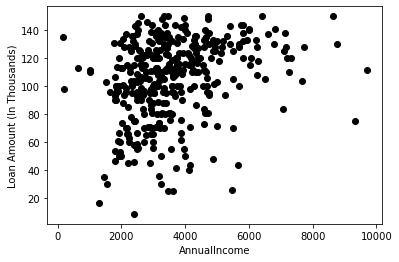

In [3]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualisasi data point
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

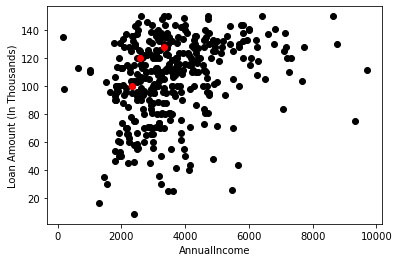

In [4]:
# Step 1 dan 2 - Pilih jumlah dari clusters (k) dan pilih secara random centroid dari setiap cluster

#number of clusters
K=3

# Pilih secara random observasi sebagai centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [5]:
# Step 3 - Tetapkan semua point ke cluster centroid terdekat
# Step 4 - Hitung ulang centroids dari clusters yang baru saja dibuat
# Step 5 - Ulang Step 3 dan 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-5-1cfaf3d682c9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-5-1cfaf3d682c9>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


596.8684348897799
590.3552348469186
528.7751784229579
404.64818500156196
339.35129178845057
190.44886908155453
190.3317152975772
320.86544014225217
235.63273762230665
248.74878646215663
125.16501318300665
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


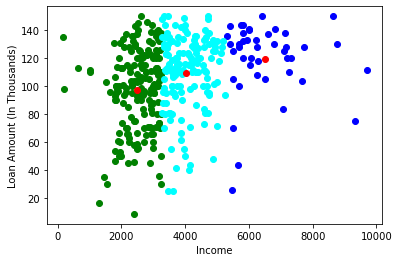

In [6]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [ ]:
#Kode 2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [8]:
data=pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
# statistik dari data
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
# standarisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistik dari data yang sudah di skala
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [11]:
# definisikan fungsi kmeans dari inisialisasi
kmeans = KMeans(n_clusters=2, init='k-means++')

# sesuaikan kmeans dengan data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [12]:
kmeans.inertia_

2599.384423783626

In [ ]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')